In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
%run Algorithms.ipynb

In [3]:
education_datasets = [
    'Datasets/bank-customer-churn-prediction.csv',
    'Datasets/financial-risk-for-loan-approval.csv',
    'Datasets/loan-approval-classification-dataset.csv'
]





finance_1_df = pd.read_csv('Datasets/bank-customer-churn-prediction.csv')
finance_2_df = pd.read_csv('Datasets/financial-risk-for-loan-approval.csv')
finance_3_df = pd.read_csv('Datasets/loan-approval-classification-dataset.csv')

education_1_df = pd.read_csv('Datasets/campus-placement-prediction.csv')
education_2_df = pd.read_csv('Datasets/predict-dropout-or-academic-success.csv')
education_3_df = pd.read_csv('Datasets/student-performance-dataset.csv')

health_1_df = pd.read_csv('Datasets/fetal-health-classifiation.csv')
health_2_df = pd.read_csv('Datasets/heart-disease-health-indicators-dataset.csv')
health_3_df = pd.read_csv('Datasets/patient-treatment-classification.csv')

In [4]:
def classify(dataframe):
    # Features and target
    if dataframe is education_1_df:
        dataframe.info()
        X = dataframe.drop(columns=['status'])
        y = dataframe['status']
    elif dataframe is education_2_df:
        X = dataframe.drop(columns=['Target'])
        y = dataframe['Target']
    elif dataframe is education_3_df:
        X = dataframe.drop(columns=['GradeClass'])
        y = dataframe['GradeClass']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train RandomForestRegressor
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = rf_classifier.predict(X_test)
    
    # Evaluate performance
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    feature_importances = rf_classifier.feature_importances_
    plt.figure(figsize=(10, 8))
    plt.bar(X.columns, feature_importances)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    plt.xticks(rotation=90)  # Rotate labels 90 degrees (vertical)
    
    # Display the plot
    plt.tight_layout() 
    plt.show()



sl_no
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    float64
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    float64
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    float64
 5   hsc_s           215 non-null    float64
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    float64
 8   workex          215 non-null    float64
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    float64
 11  mba_p           215 non-null    float64
 12  status          215 non-null    float64
dtypes: float64(13)
memory usage: 22.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          -

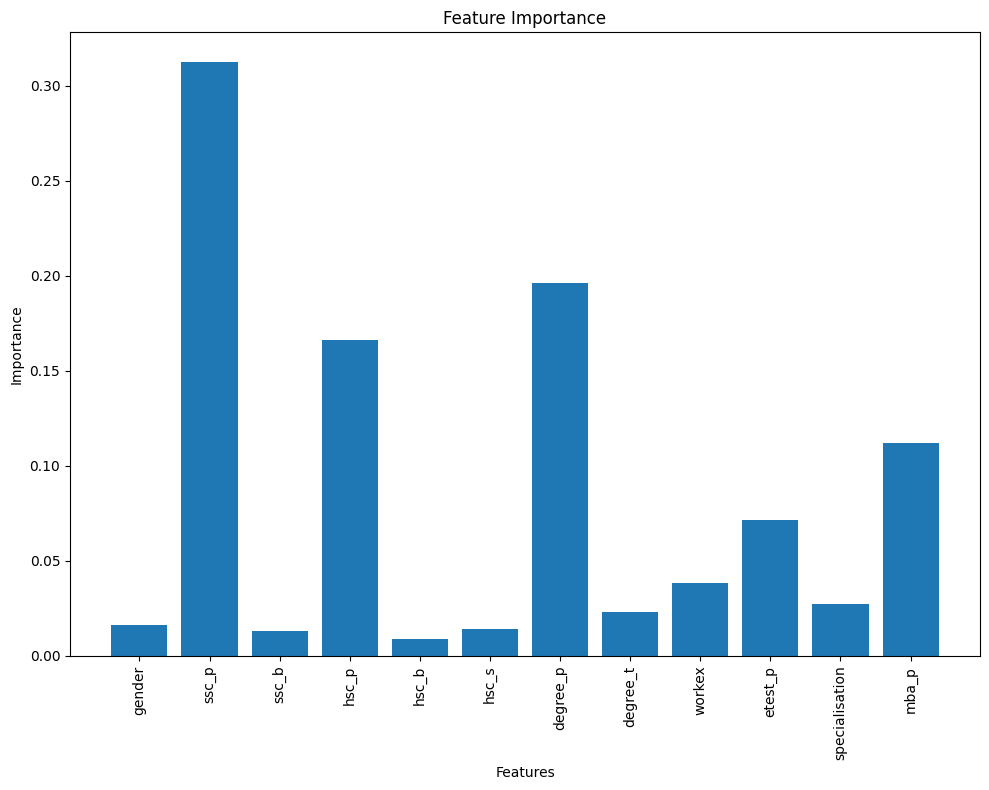

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

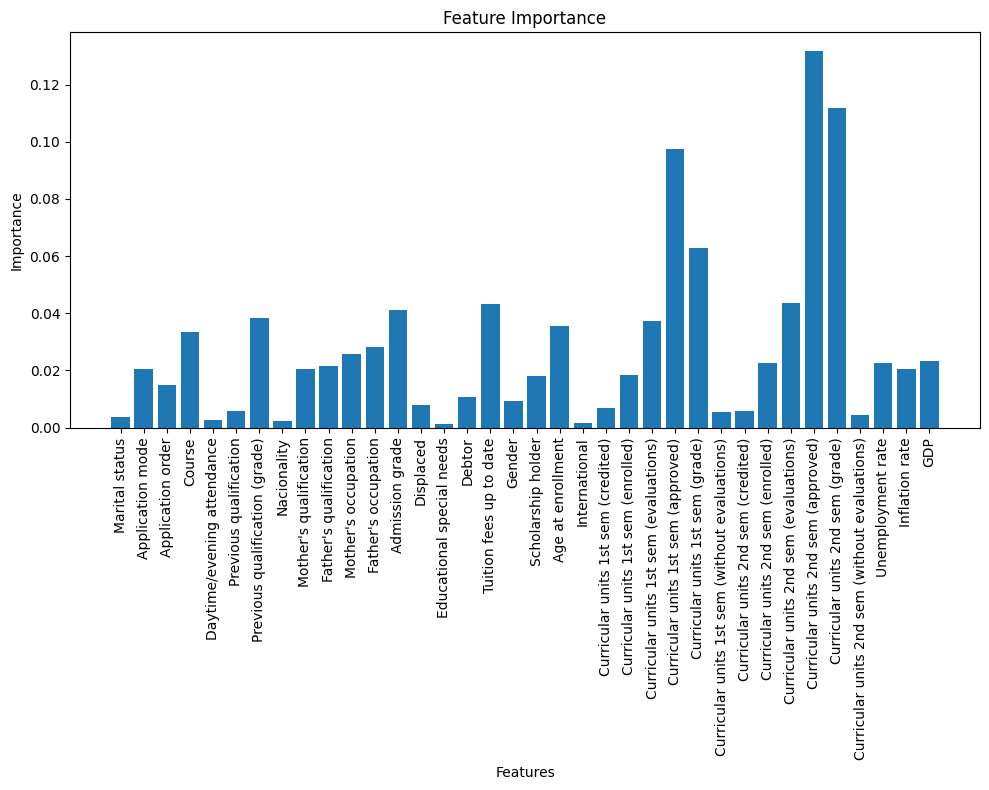

StudentID
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GPA                2392 non-null   float64
 13  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(11)
memory usage: 261.8 KB
Accuracy: 0.9102296450939458

Classification Report:
         

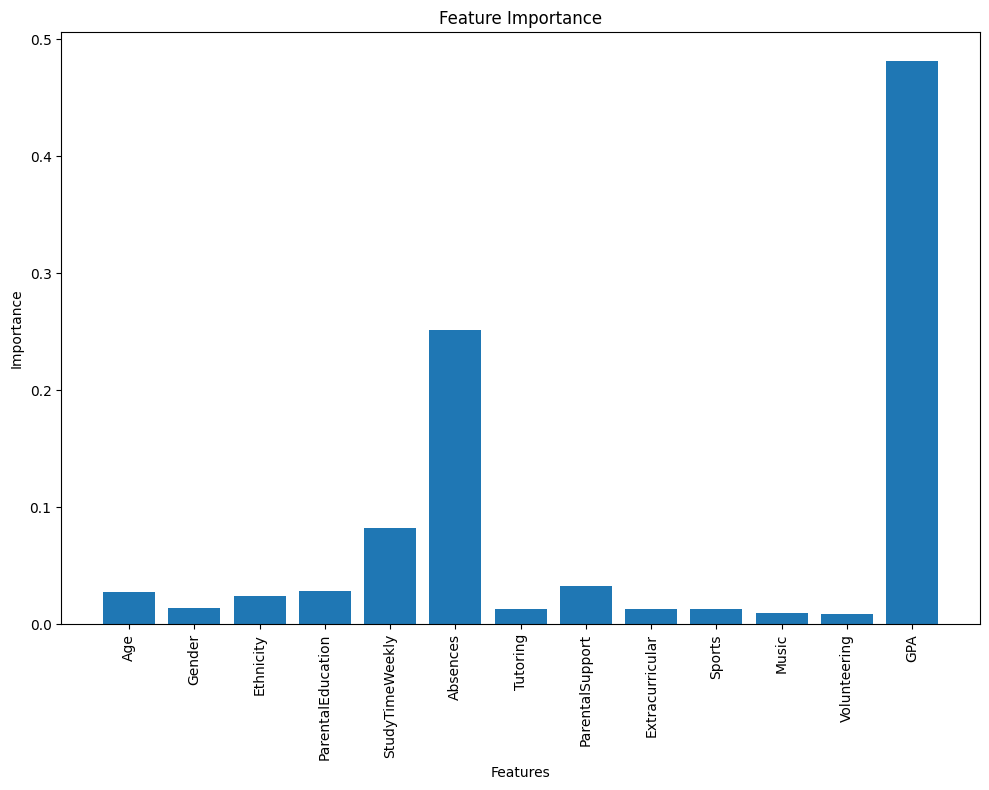

In [5]:
education_1_df = preprocessing(education_1_df)
classify(education_1_df)
education_2_df = preprocessing(education_2_df)
classify(education_2_df)
education_3_df = preprocessing(education_3_df)
classify(education_3_df)

sl_no
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    float64
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    float64
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    float64
 5   hsc_s           215 non-null    float64
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    float64
 8   workex          215 non-null    float64
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    float64
 11  mba_p           215 non-null    float64
 12  status          215 non-null    float64
dtypes: float64(13)
memory usage: 22.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Cou

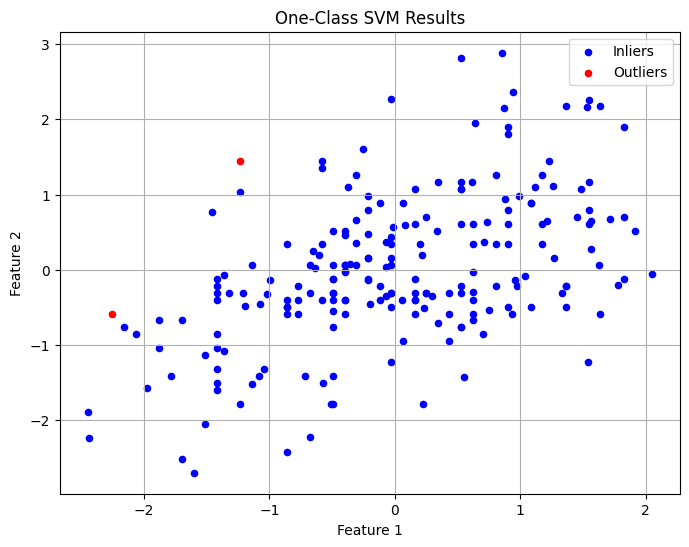

213
     pcost       dcost       gap    pres   dres
 0:  4.8537e+00 -1.0126e+02  7e+02  3e+00  8e-15
 1:  5.2586e+00 -4.8895e+01  7e+01  1e-01  5e-15
 2:  5.9416e+00 -3.4755e+00  1e+01  2e-02  5e-15
 3:  6.1923e+00  3.7680e+00  3e+00  6e-03  3e-15
 4:  6.3680e+00  4.3450e+00  3e+00  4e-03  3e-15
 5:  6.7026e+00  6.1167e+00  7e-01  6e-04  4e-15
 6:  6.6217e+00  6.5969e+00  3e-02  2e-05  3e-15
 7:  6.6148e+00  6.6144e+00  5e-04  3e-07  3e-15
 8:  6.6147e+00  6.6147e+00  5e-06  3e-09  4e-15
Optimal solution found.
Outlier IDs: [ 14  52 147 159]


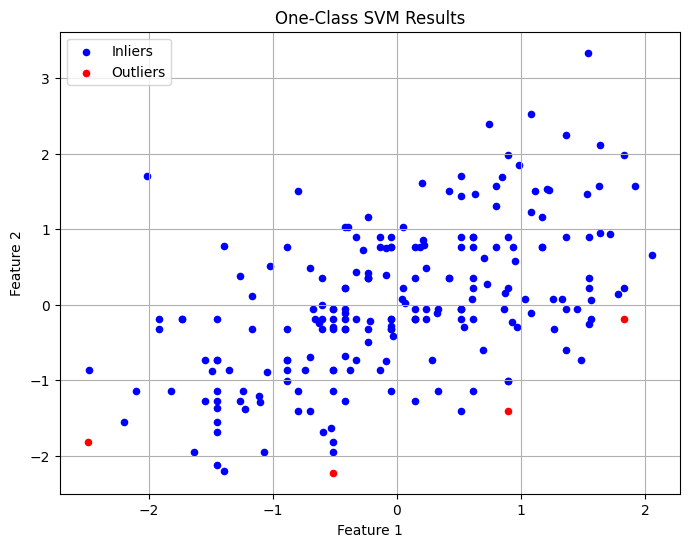

209
     pcost       dcost       gap    pres   dres
 0:  5.2829e+00 -1.0145e+02  7e+02  3e+00  1e-14
 1:  5.9868e+00 -4.8427e+01  8e+01  1e-01  7e-15
 2:  6.6630e+00  1.4214e-01  8e+00  1e-02  4e-15
 3:  6.7840e+00  4.0822e+00  4e+00  5e-03  3e-15
 4:  6.8501e+00  6.6597e+00  2e-01  2e-04  4e-15
 5:  6.8270e+00  6.8240e+00  3e-03  3e-06  3e-15
 6:  6.8263e+00  6.8263e+00  3e-05  3e-08  4e-15
 7:  6.8263e+00  6.8263e+00  3e-07  3e-10  3e-15
Optimal solution found.
Outlier IDs: [ 4 60 97]


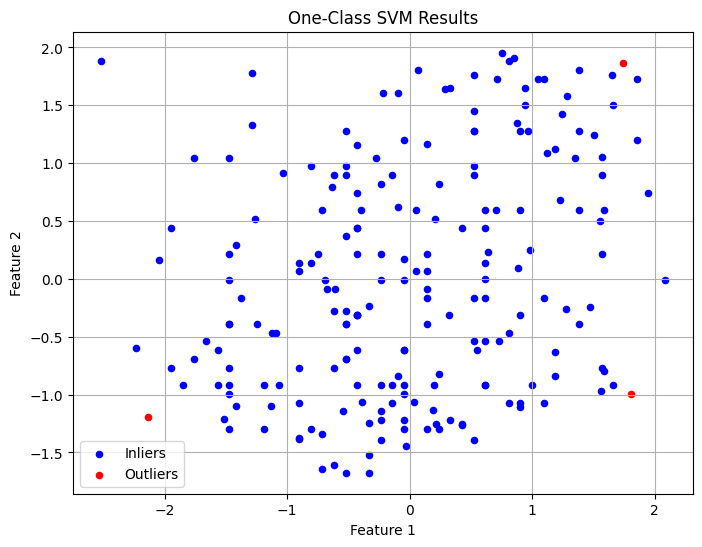

206
     pcost       dcost       gap    pres   dres
 0:  5.2921e+00 -1.0171e+02  7e+02  3e+00  1e-14
 1:  5.8914e+00 -4.8597e+01  8e+01  2e-01  6e-15
 2:  6.5597e+00 -4.6153e+00  1e+01  3e-02  5e-15
 3:  6.8689e+00  4.7357e+00  3e+00  5e-03  3e-15
 4:  7.1863e+00  6.9133e+00  4e-01  6e-04  4e-15
 5:  7.2331e+00  7.2274e+00  8e-03  1e-05  4e-15
 6:  7.2337e+00  7.2337e+00  9e-05  1e-07  3e-15
 7:  7.2337e+00  7.2337e+00  9e-07  1e-09  4e-15
Optimal solution found.
Outlier IDs: [ 17  81 139]


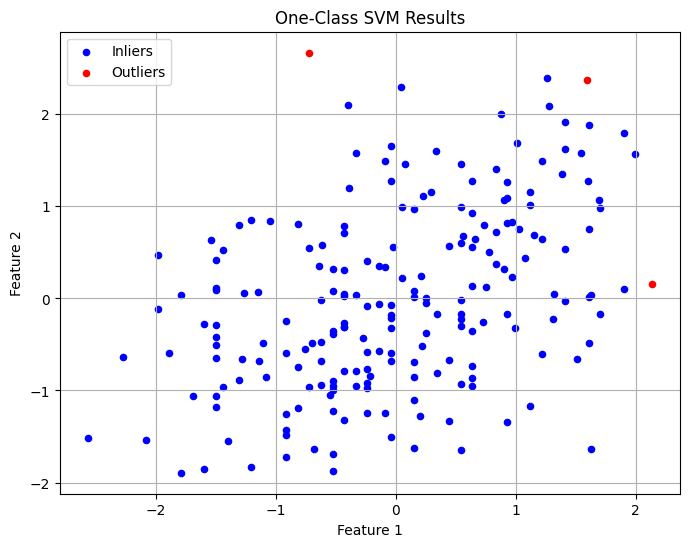

203
     pcost       dcost       gap    pres   dres
 0:  4.4687e+00 -1.1142e+02  8e+02  3e+00  9e-15
 1:  5.0396e+00 -5.6109e+01  9e+01  2e-01  6e-15
 2:  5.6977e+00 -4.3889e+00  1e+01  2e-02  5e-15
 3:  5.8662e+00  4.8443e+00  1e+00  2e-03  3e-15
 4:  5.9078e+00  5.6829e+00  3e-01  4e-04  3e-15
 5:  5.9035e+00  5.8898e+00  1e-02  3e-06  2e-15
 6:  5.8982e+00  5.8980e+00  2e-04  3e-08  3e-15
 7:  5.8981e+00  5.8981e+00  2e-06  3e-10  3e-15
Optimal solution found.
Outlier IDs: [39 46 63 85]


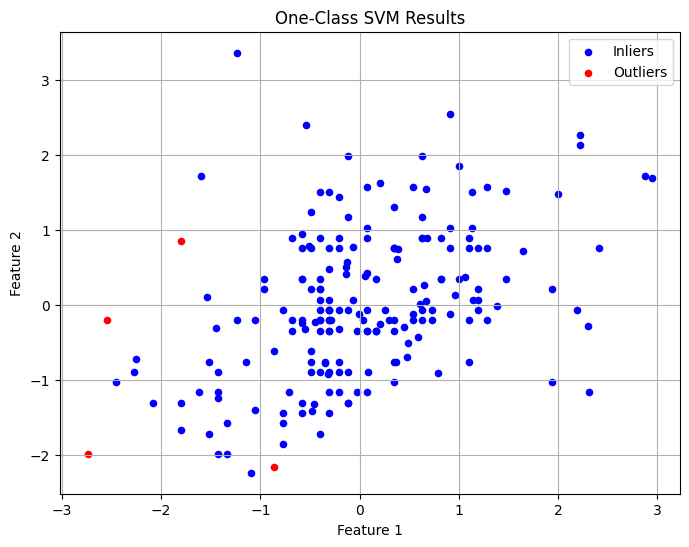

199
     pcost       dcost       gap    pres   dres
 0:  4.7461e+00 -1.0196e+02  7e+02  3e+00  1e-14
 1:  5.2465e+00 -4.7863e+01  8e+01  2e-01  7e-15
 2:  5.8493e+00 -1.0070e+00  9e+00  2e-02  6e-15
 3:  5.9969e+00  4.9629e+00  1e+00  2e-03  4e-15
 4:  6.0110e+00  5.6827e+00  4e-01  7e-04  4e-15
 5:  6.0351e+00  5.8713e+00  2e-01  1e-04  4e-15
 6:  5.9930e+00  5.9813e+00  1e-02  4e-06  4e-15
 7:  5.9878e+00  5.9876e+00  2e-04  5e-08  4e-15
 8:  5.9877e+00  5.9877e+00  2e-06  5e-10  5e-15
Optimal solution found.
Outlier IDs: [  0 154]


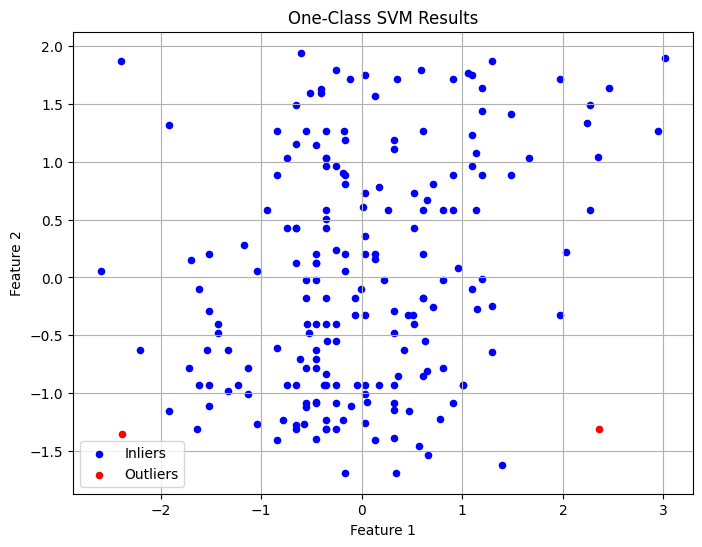

197
     pcost       dcost       gap    pres   dres
 0:  5.2082e+00 -1.0152e+02  7e+02  3e+00  1e-14
 1:  5.6346e+00 -4.7193e+01  7e+01  1e-01  7e-15
 2:  6.3078e+00 -1.6490e+00  1e+01  2e-02  6e-15
 3:  6.6604e+00  4.4204e+00  3e+00  5e-03  6e-15
 4:  6.9002e+00  6.5534e+00  5e-01  7e-04  6e-15
 5:  6.9417e+00  6.9377e+00  6e-03  8e-06  6e-15
 6:  6.9422e+00  6.9422e+00  6e-05  8e-08  6e-15
 7:  6.9422e+00  6.9422e+00  6e-07  8e-10  7e-15
Optimal solution found.
Outlier IDs: [ 20  32 107]


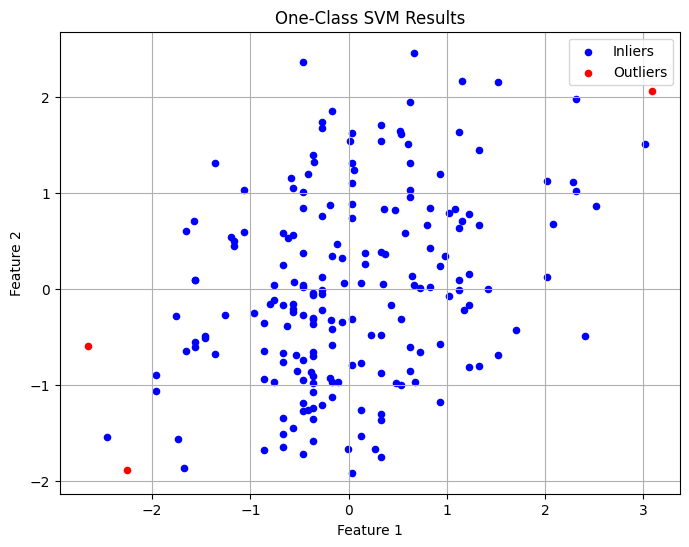

194
     pcost       dcost       gap    pres   dres
 0:  5.2472e+00 -1.0177e+02  7e+02  3e+00  1e-14
 1:  5.7585e+00 -4.6578e+01  7e+01  1e-01  8e-15
 2:  6.5313e+00 -9.2537e-01  9e+00  2e-02  6e-15
 3:  6.7551e+00  4.9191e+00  2e+00  3e-03  4e-15
 4:  6.8274e+00  6.5663e+00  3e-01  6e-05  4e-15
 5:  6.7596e+00  6.7127e+00  5e-02  1e-05  3e-15
 6:  6.7437e+00  6.7424e+00  1e-03  6e-08  3e-15
 7:  6.7431e+00  6.7431e+00  1e-05  6e-10  4e-15
 8:  6.7431e+00  6.7431e+00  1e-07  6e-12  3e-15
Optimal solution found.
Outlier IDs: [ 20  25 170]


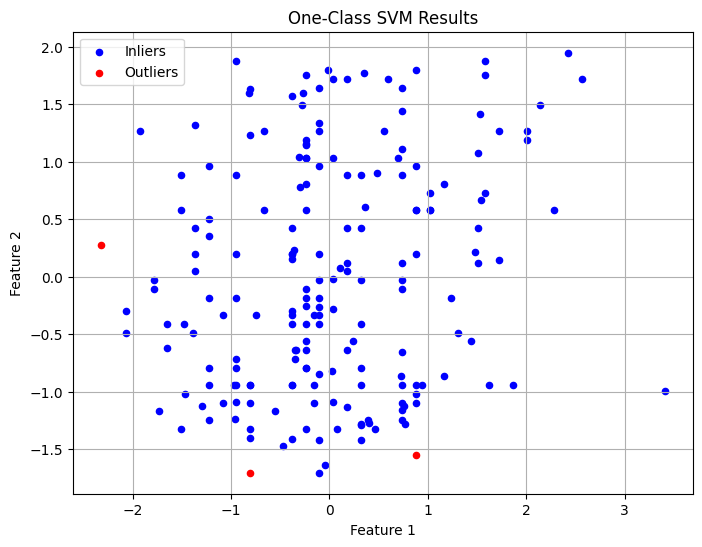

191
     pcost       dcost       gap    pres   dres
 0:  5.4076e+00 -1.0315e+02  7e+02  3e+00  1e-14
 1:  5.8550e+00 -4.7378e+01  7e+01  1e-01  1e-14
 2:  6.6782e+00 -3.4353e-01  9e+00  2e-02  7e-15
 3:  6.8474e+00  5.0254e+00  2e+00  4e-03  6e-15
 4:  7.0804e+00  6.8884e+00  3e-01  4e-04  7e-15
 5:  7.0970e+00  7.0942e+00  4e-03  5e-06  7e-15
 6:  7.0973e+00  7.0973e+00  4e-05  5e-08  7e-15
 7:  7.0973e+00  7.0973e+00  4e-07  5e-10  7e-15
Optimal solution found.
Outlier IDs: [ 23 146 174]


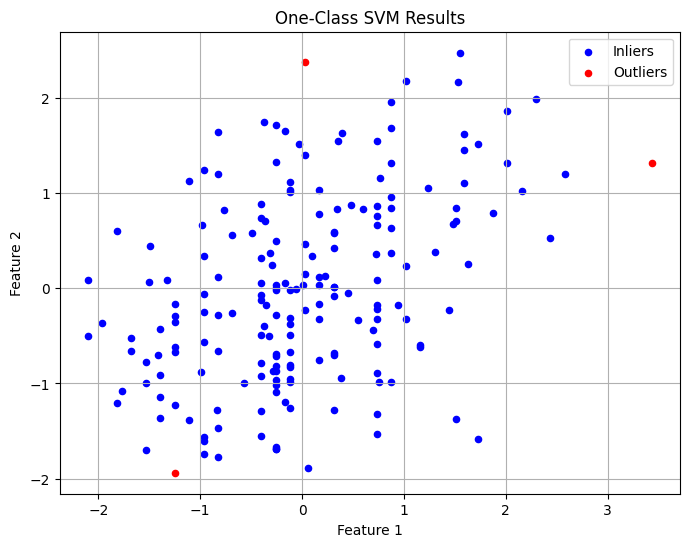

188
     pcost       dcost       gap    pres   dres
 0:  6.2058e+00 -1.0119e+02  6e+02  3e+00  1e-14
 1:  6.9135e+00 -4.4632e+01  7e+01  1e-01  1e-14
 2:  7.4181e+00 -2.9451e+00  1e+01  2e-02  6e-15
 3:  7.7411e+00  4.8565e+00  4e+00  5e-03  5e-15
 4:  7.8889e+00  7.0136e+00  1e+00  1e-03  5e-15
 5:  7.8848e+00  7.7674e+00  1e-01  2e-04  5e-15
 6:  7.8760e+00  7.8598e+00  2e-02  2e-05  5e-15
 7:  7.8737e+00  7.8734e+00  3e-04  4e-08  5e-15
 8:  7.8736e+00  7.8736e+00  3e-06  4e-10  5e-15
Optimal solution found.
Outlier IDs: [  3 102 142]


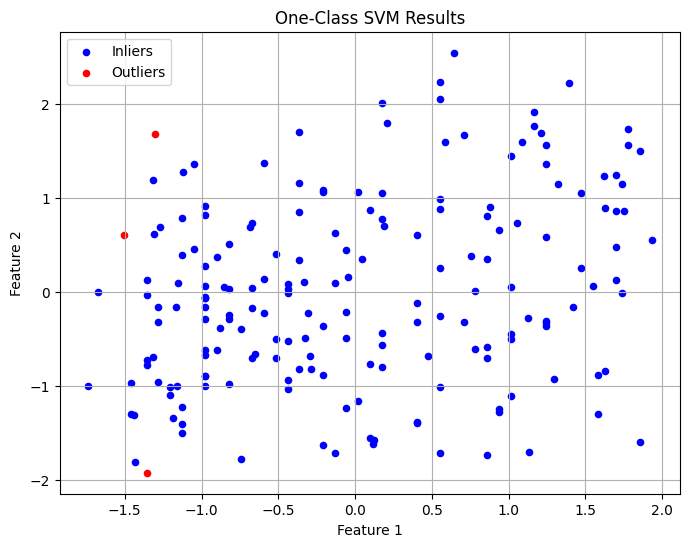

185
['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']
     pcost       dcost       gap    pres   dres
 0:  3.0887e+00 -1.1307e+02  1e+04  7e+01  2e-14
 1:  3.2965e+00 -1.0885e+02  9e+02  5e+00  1e-14
 2:  3.9049e+00 -7.5846e+01  1e+02  3e-01  6e-15
 3:  4.3026e+00 -9.5917e+00  2e+01  4e-02  5e-15
 4:  4.3728e+00 -1.4071e+00  7e+00  1e-02  4e-15
 5:  4.4001e+00  1.4827e+00  4e+00  7e-03  4e-15
 6:  4.4080e+00  2.8243e+00  2e+00  3e-03  5e-15
 7:  4.4001e+00  3.7812e+00  7e-01  8e-04  5e-15
 8:  4.4003e+00  4.0838e+00  3e-01  5e-16  6e-15


KeyboardInterrupt: 

In [6]:
education_1_df = pd.read_csv('Datasets/campus-placement-prediction.csv')
education_2_df = pd.read_csv('Datasets/predict-dropout-or-academic-success.csv')
education_3_df = pd.read_csv('Datasets/student-performance-dataset.csv')
education_1_df = preprocessing(education_1_df)
education_2_df = preprocessing(education_2_df)
education_3_df = preprocessing(education_3_df)
education_1_df = drop_OCSVM(education_1_df)
education_2_df = drop_OCSVM(education_2_df)
education_3_df = drop_OCSVM(education_3_df)
classify(education_1_df)
classify(education_2_df)
classify(education_3_df)

sl_no
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    float64
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    float64
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    float64
 5   hsc_s           215 non-null    float64
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    float64
 8   workex          215 non-null    float64
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    float64
 11  mba_p           215 non-null    float64
 12  status          215 non-null    float64
dtypes: float64(13)
memory usage: 22.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Cou

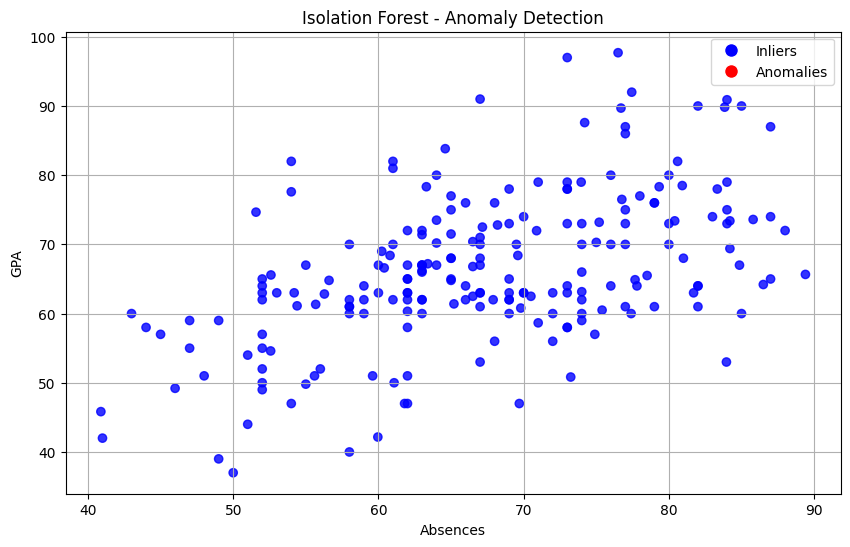

215


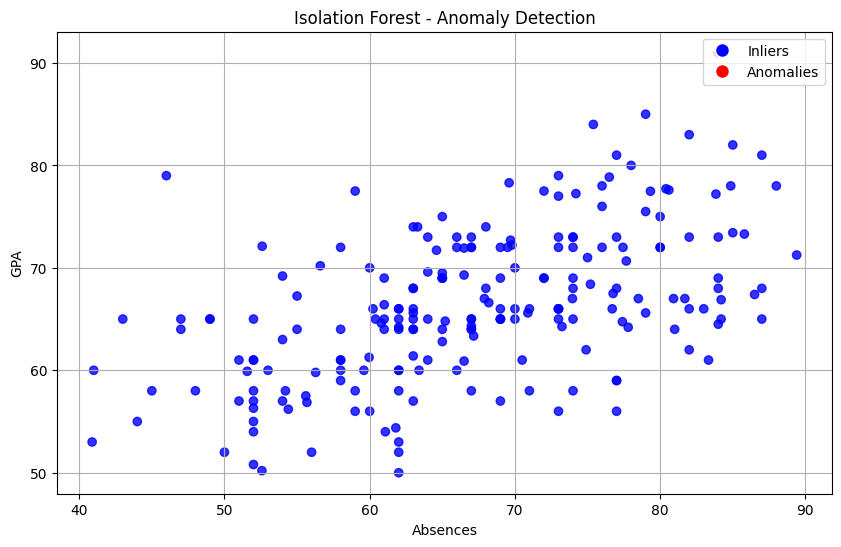

214


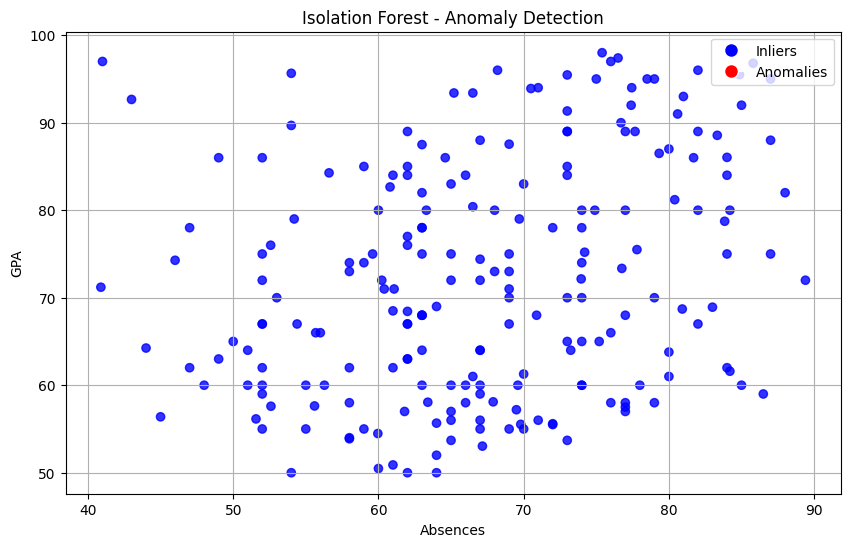

214


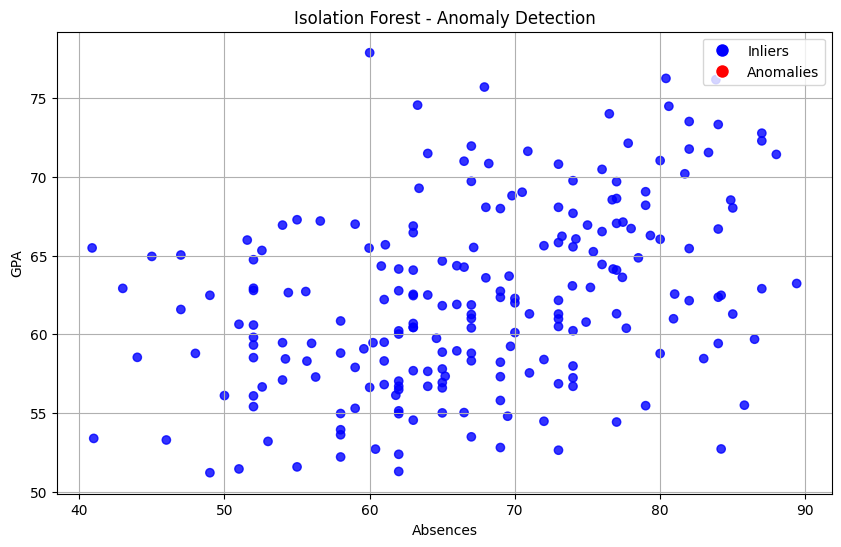

214


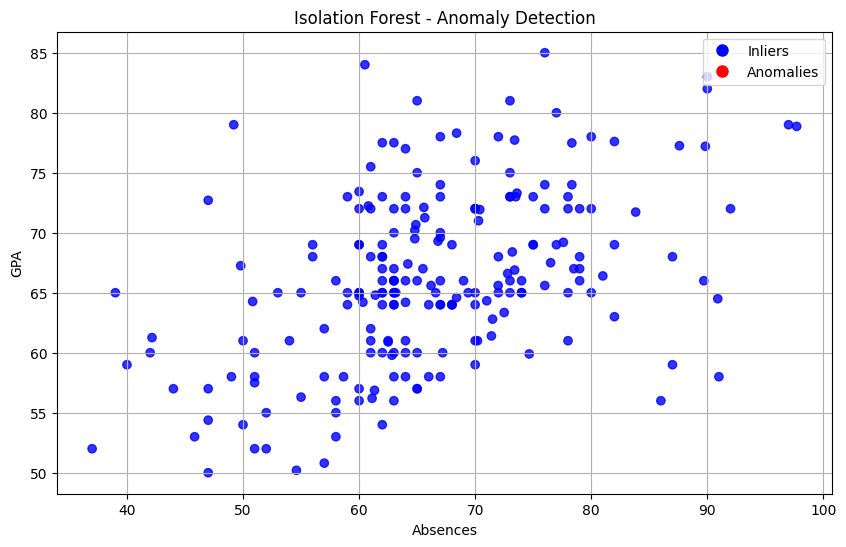

214


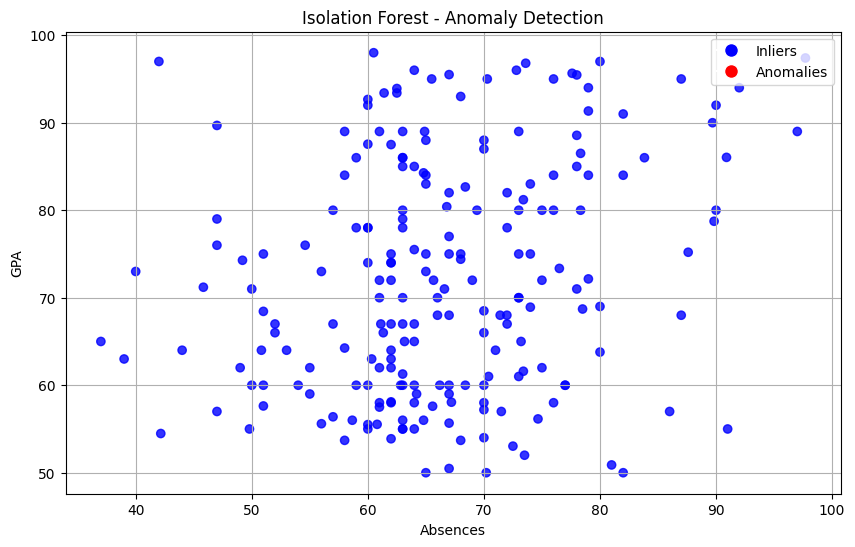

214


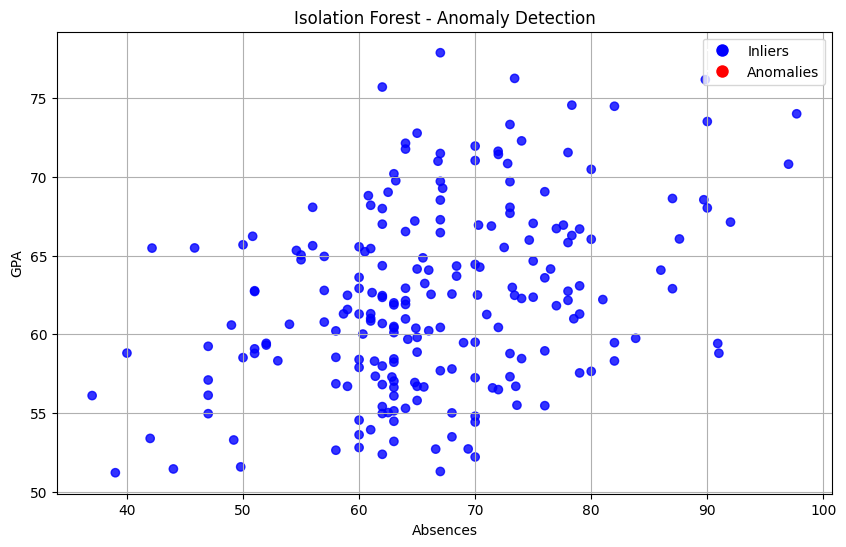

214


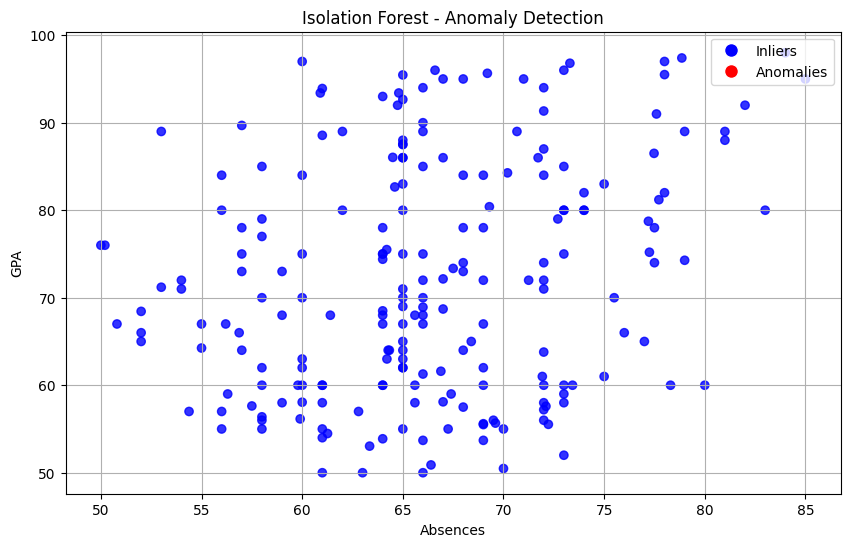

214


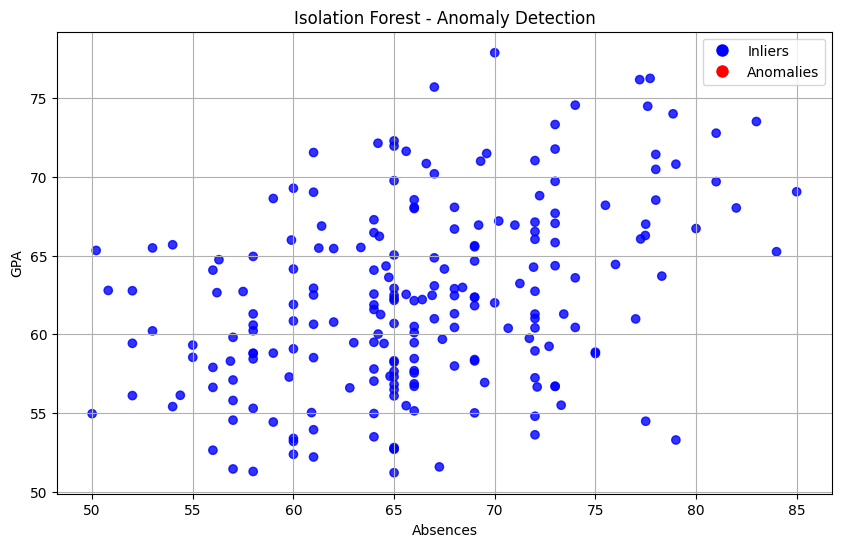

214


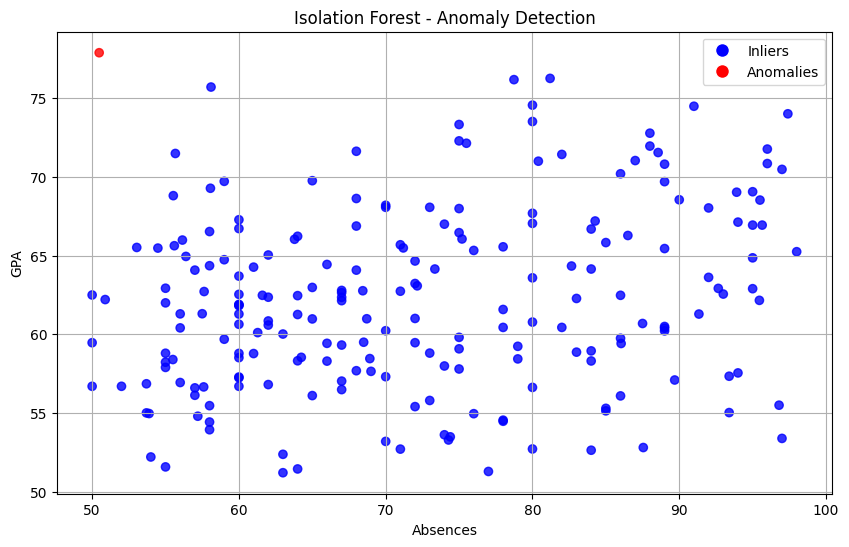

213
['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']


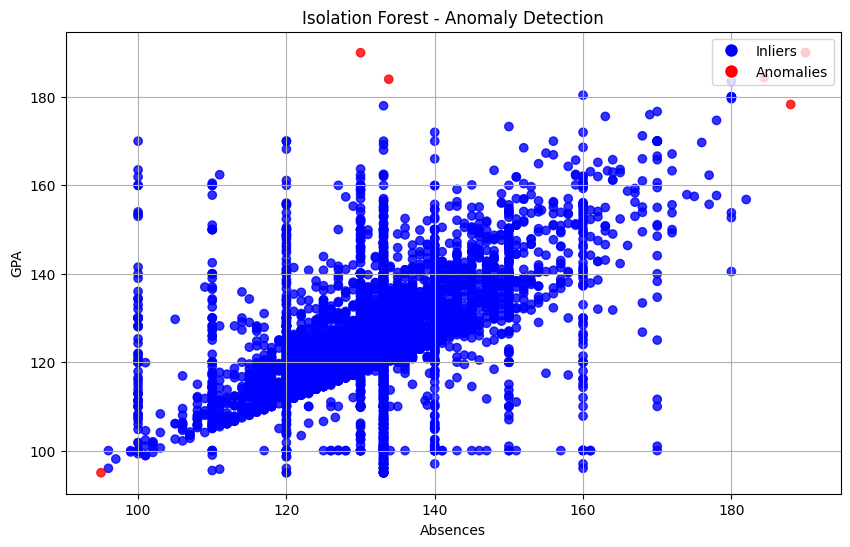

4417


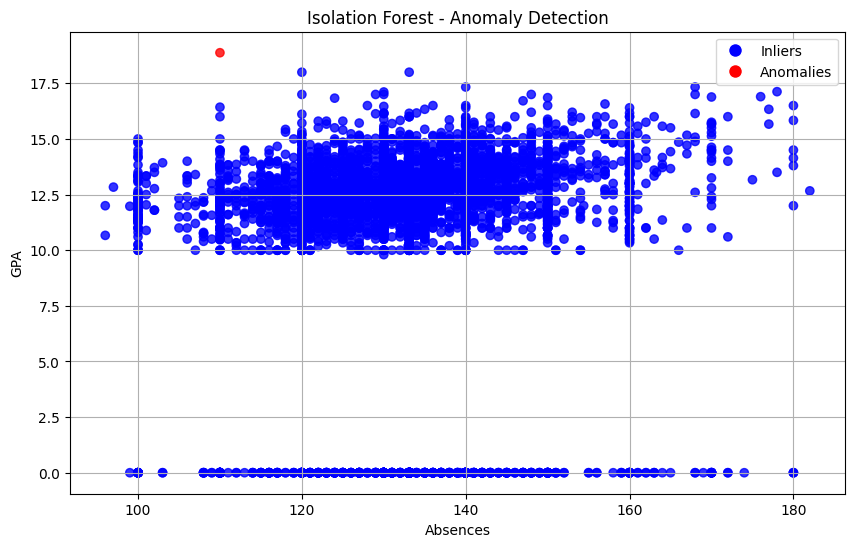

4416


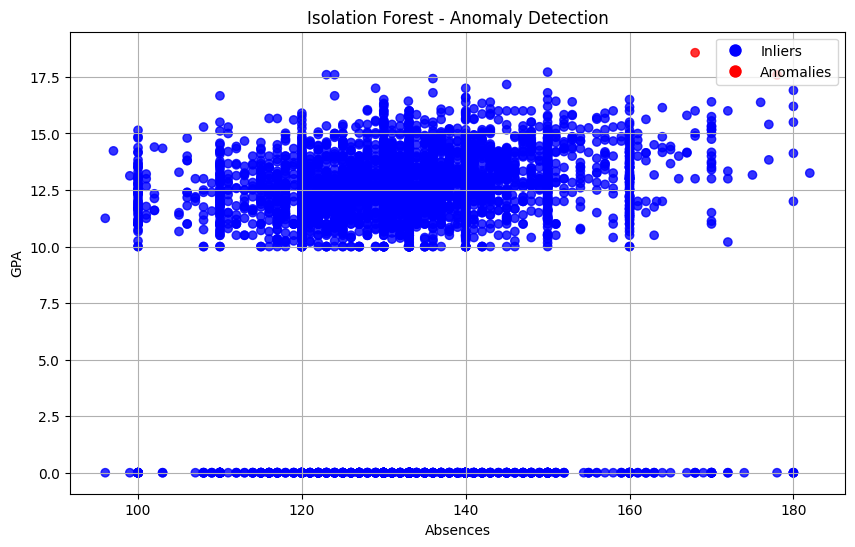

4414


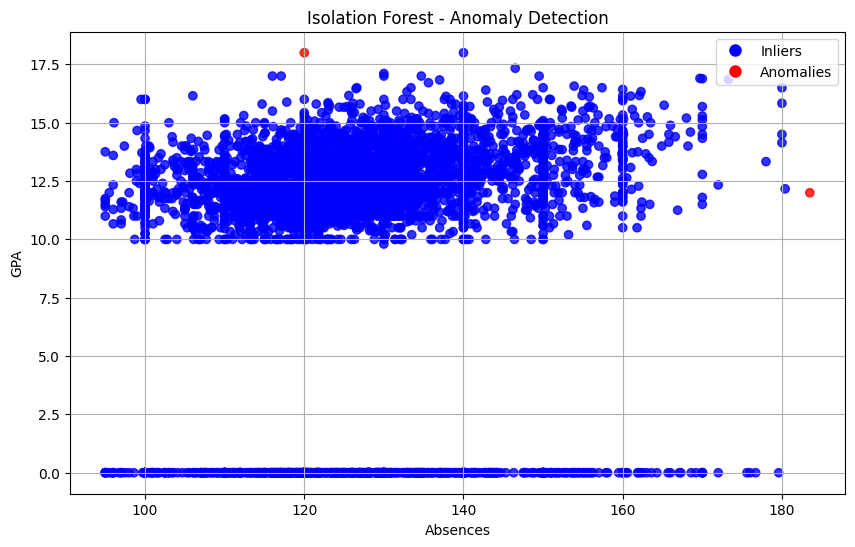

4412


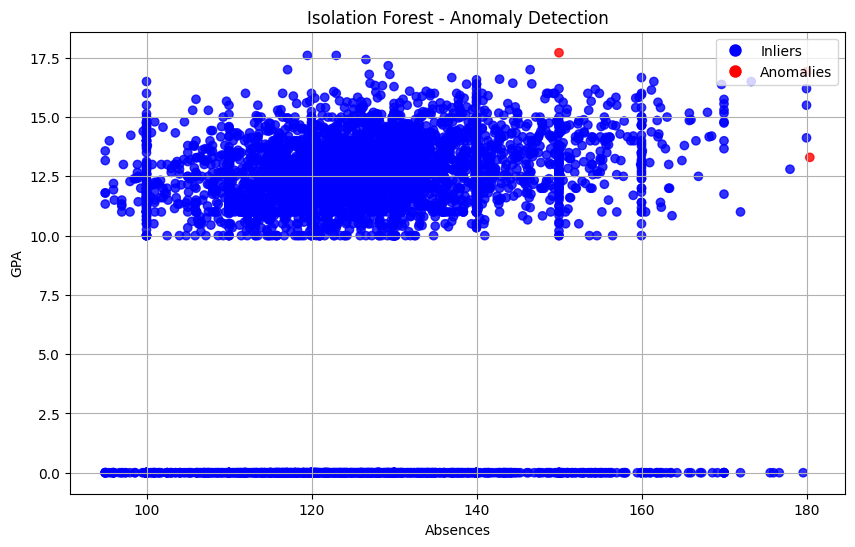

4409


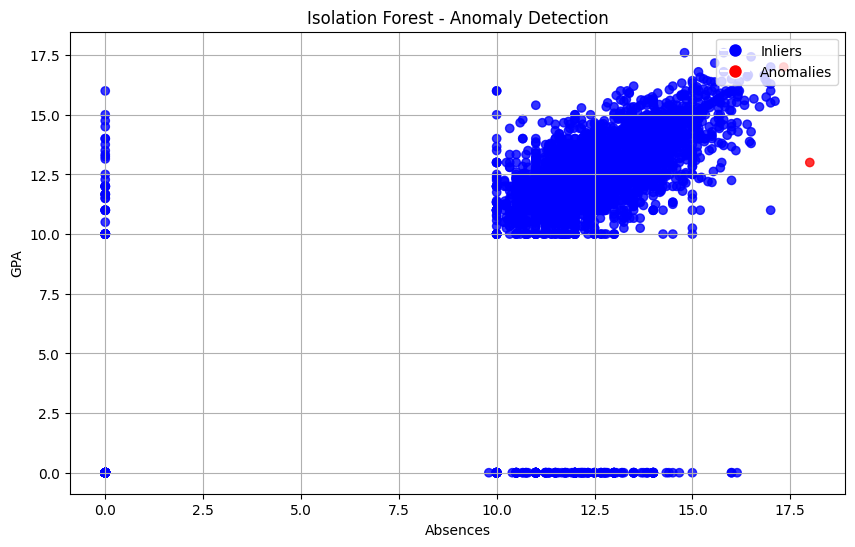

4407
['StudyTimeWeekly', 'GPA']


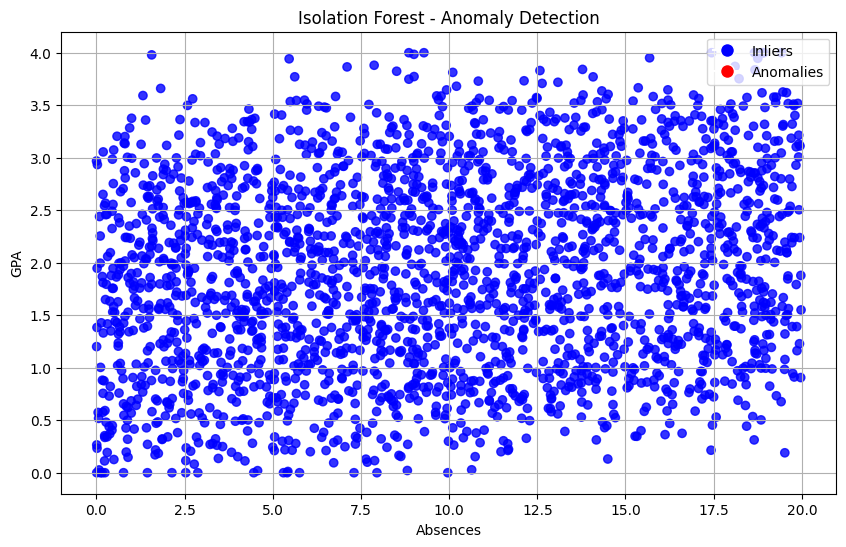

2392
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          213 non-null    float64
 1   ssc_p           213 non-null    float64
 2   ssc_b           213 non-null    float64
 3   hsc_p           213 non-null    float64
 4   hsc_b           213 non-null    float64
 5   hsc_s           213 non-null    float64
 6   degree_p        213 non-null    float64
 7   degree_t        213 non-null    float64
 8   workex          213 non-null    float64
 9   etest_p         213 non-null    float64
 10  specialisation  213 non-null    float64
 11  mba_p           213 non-null    float64
 12  status          213 non-null    float64
dtypes: float64(13)
memory usage: 21.8 KB
Accuracy: 0.8604651162790697

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.88      0.90        32
         1

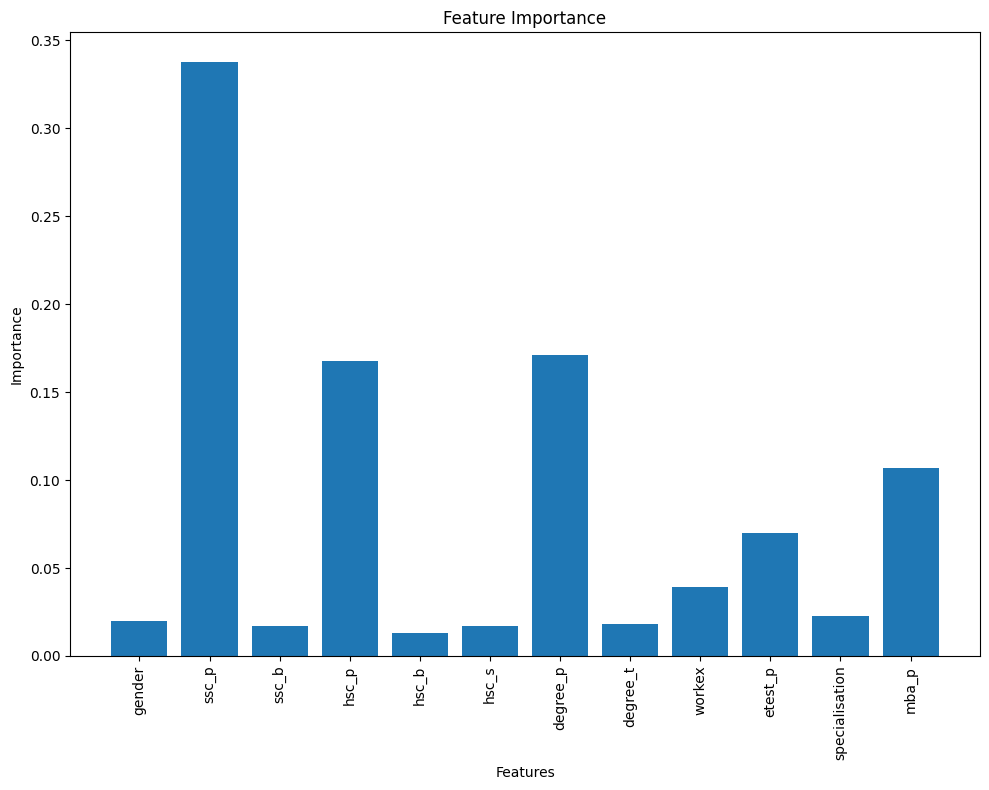

Accuracy: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.77      0.80       261
         1.0       0.78      0.95      0.86       455
         2.0       0.62      0.31      0.41       166

    accuracy                           0.78       882
   macro avg       0.74      0.68      0.69       882
weighted avg       0.76      0.78      0.76       882



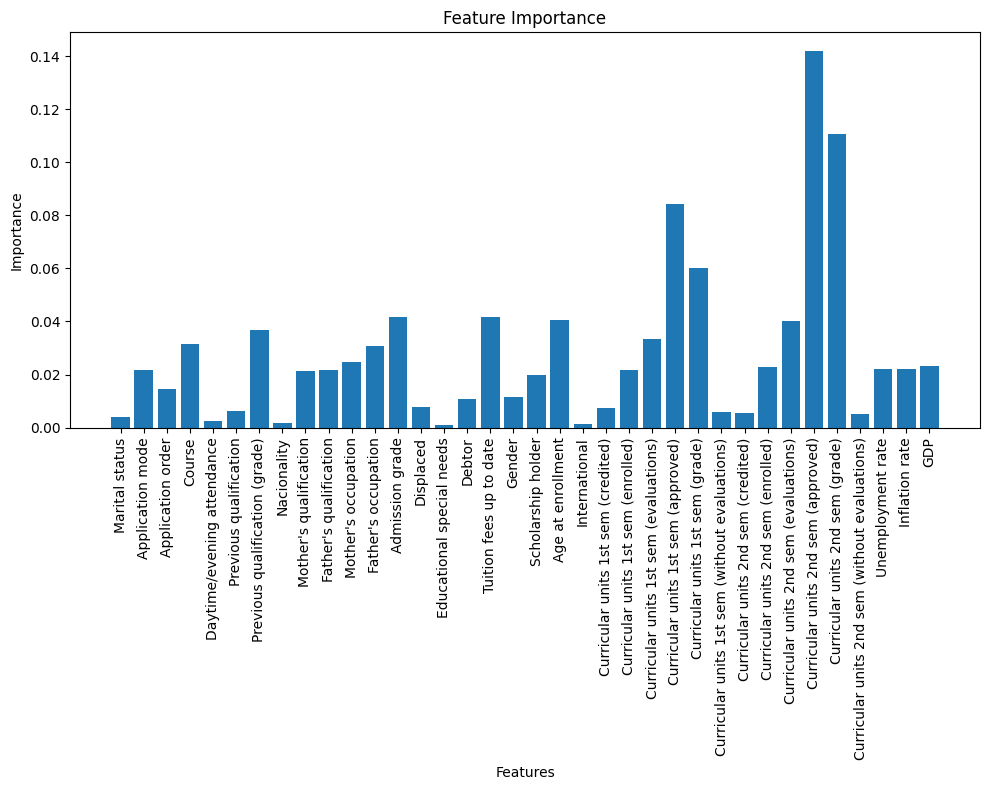

Accuracy: 0.9102296450939458

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.45      0.59        22
         1.0       0.81      0.86      0.83        49
         2.0       0.93      0.87      0.90        85
         3.0       0.89      0.90      0.89        86
         4.0       0.94      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.88      0.81      0.83       479
weighted avg       0.91      0.91      0.91       479



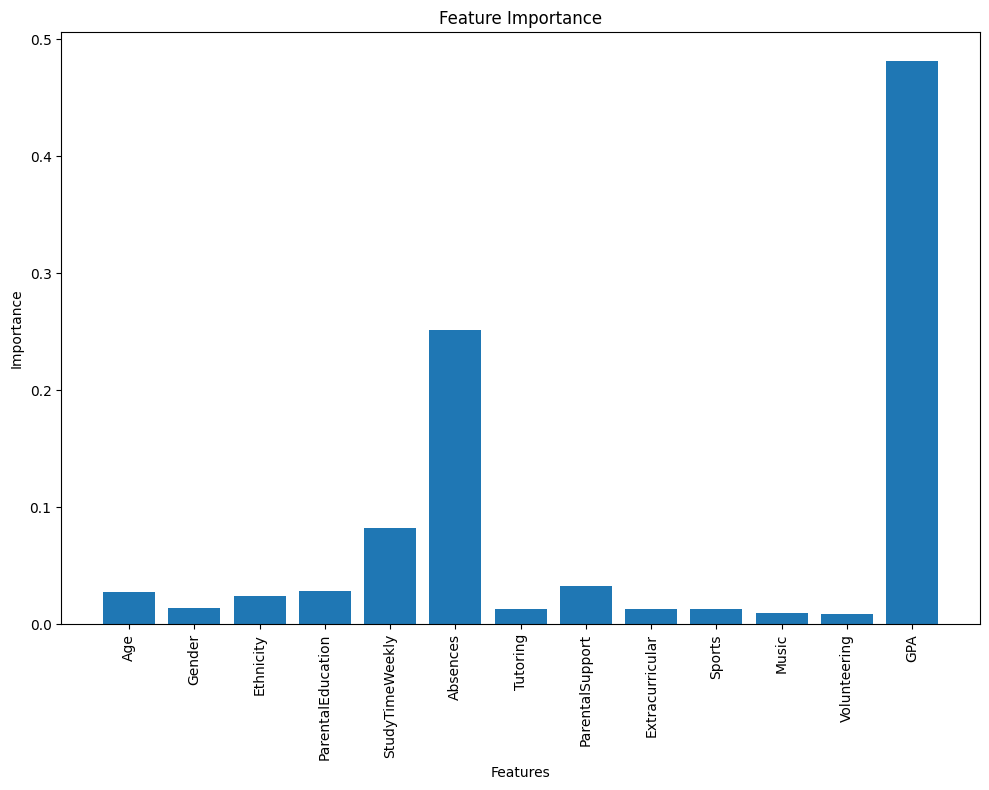

In [7]:
education_1_df = pd.read_csv('Datasets/campus-placement-prediction.csv')
education_2_df = pd.read_csv('Datasets/predict-dropout-or-academic-success.csv')
education_3_df = pd.read_csv('Datasets/student-performance-dataset.csv')
education_1_df = preprocessing(education_1_df)
education_2_df = preprocessing(education_2_df)
education_3_df = preprocessing(education_3_df)
education_1_df = drop_IF(education_1_df)
education_2_df = drop_IF(education_2_df)
education_3_df = drop_IF(education_3_df)
classify(education_1_df)
classify(education_2_df)
classify(education_3_df)

sl_no
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    float64
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    float64
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    float64
 5   hsc_s           215 non-null    float64
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    float64
 8   workex          215 non-null    float64
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    float64
 11  mba_p           215 non-null    float64
 12  status          215 non-null    float64
dtypes: float64(13)
memory usage: 22.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Cou

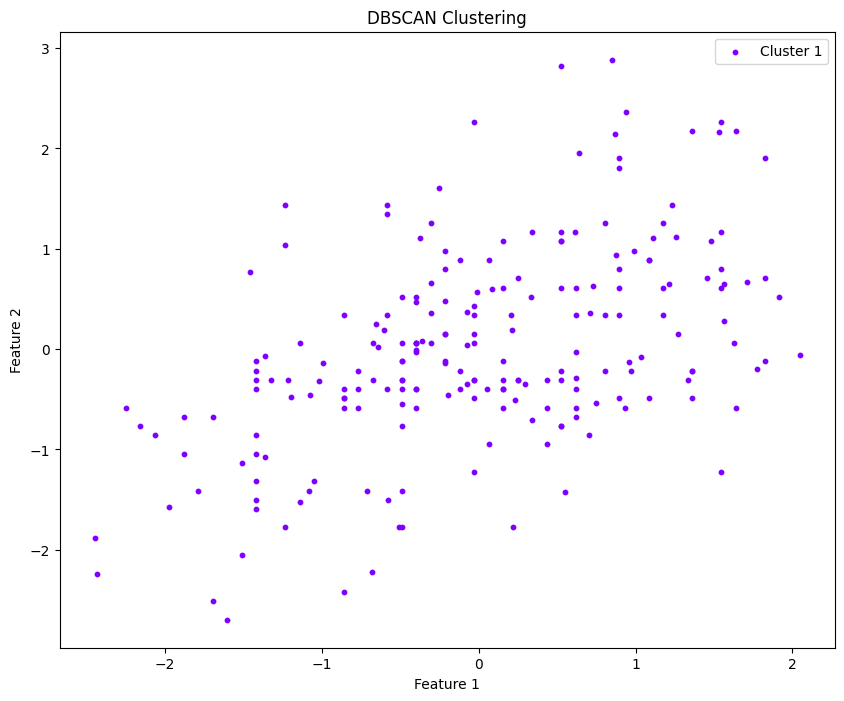

215


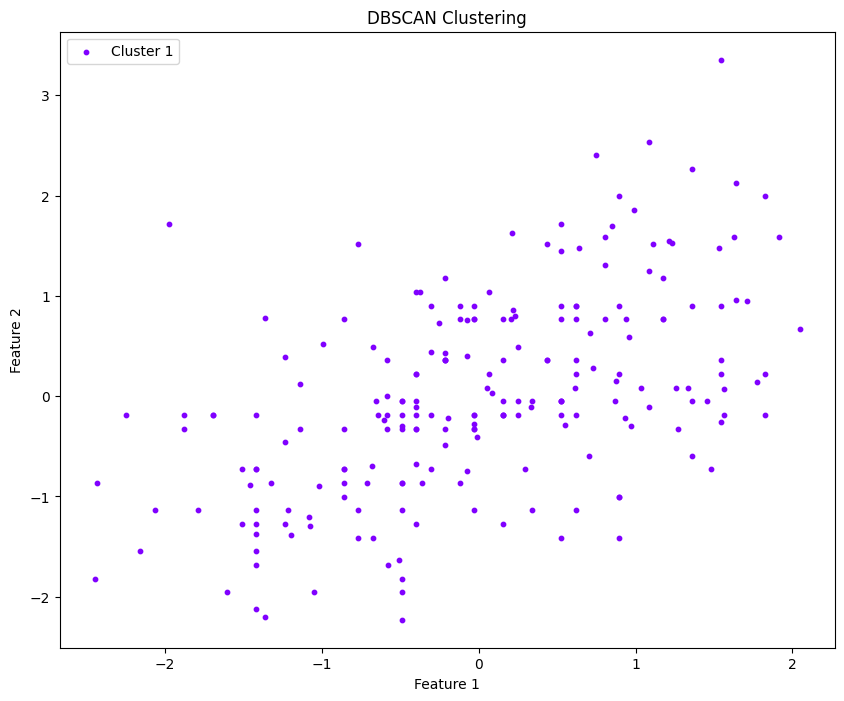

215


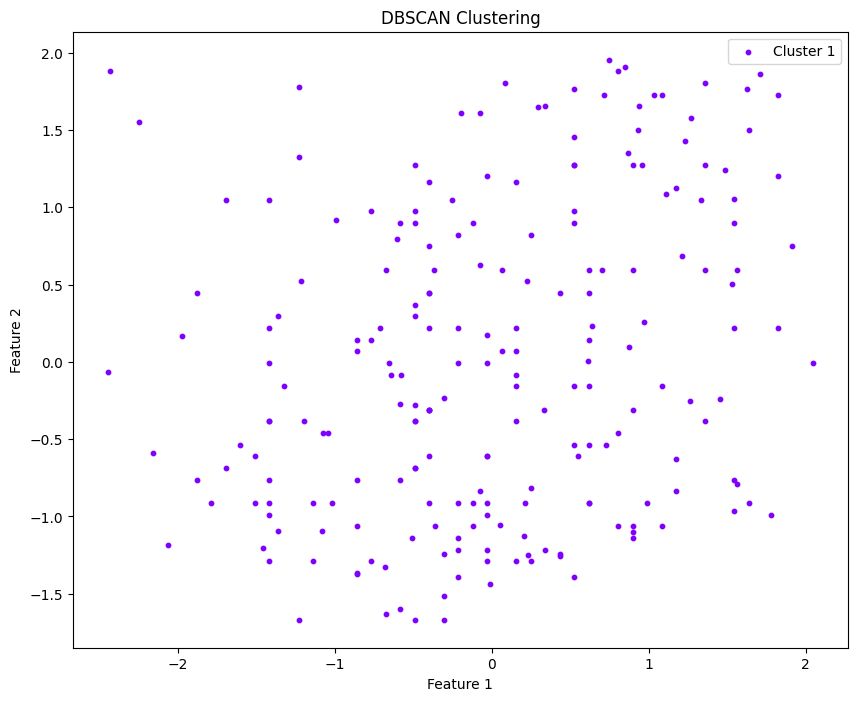

215


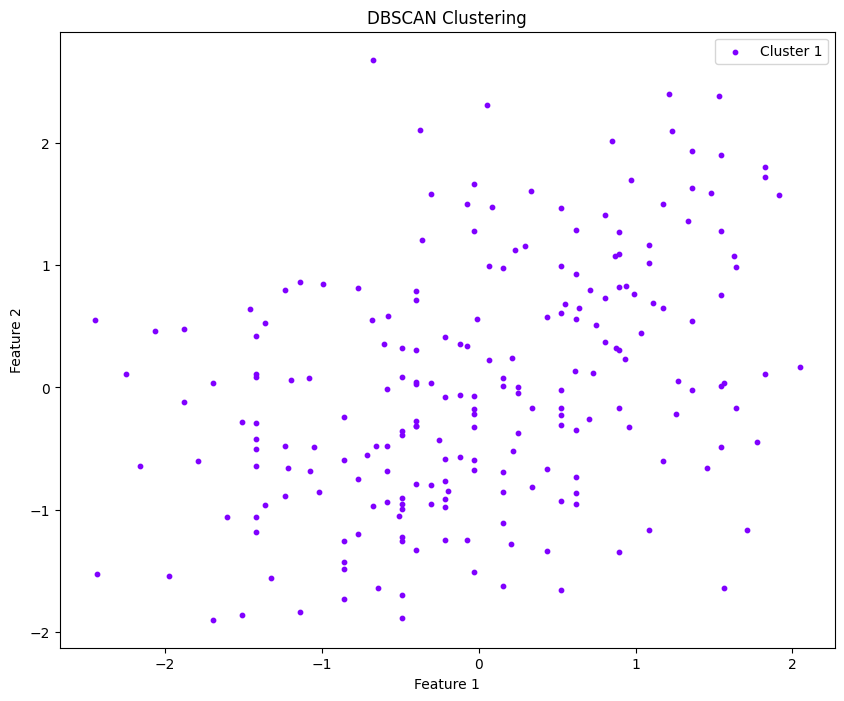

215


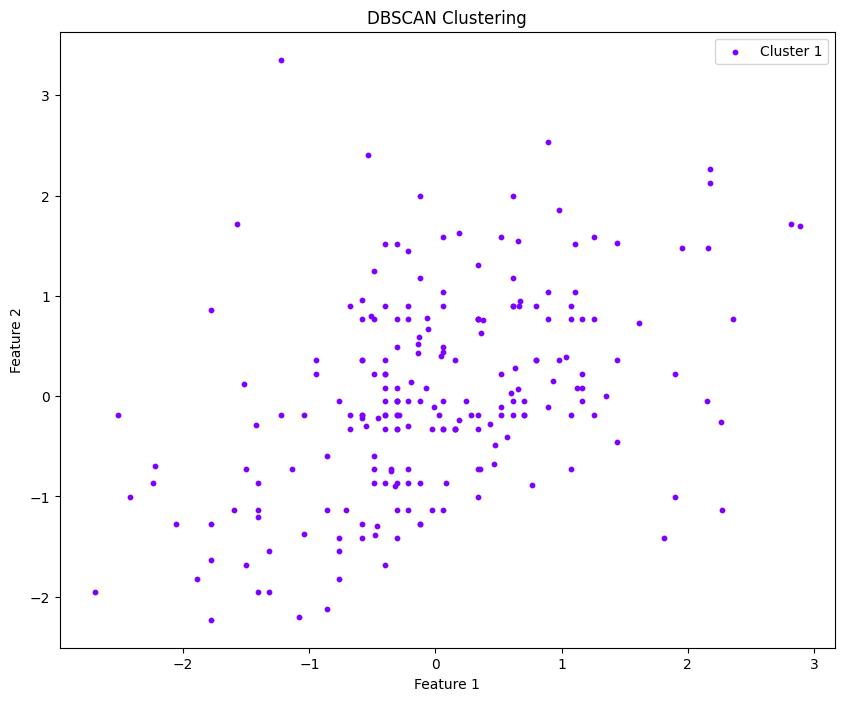

215


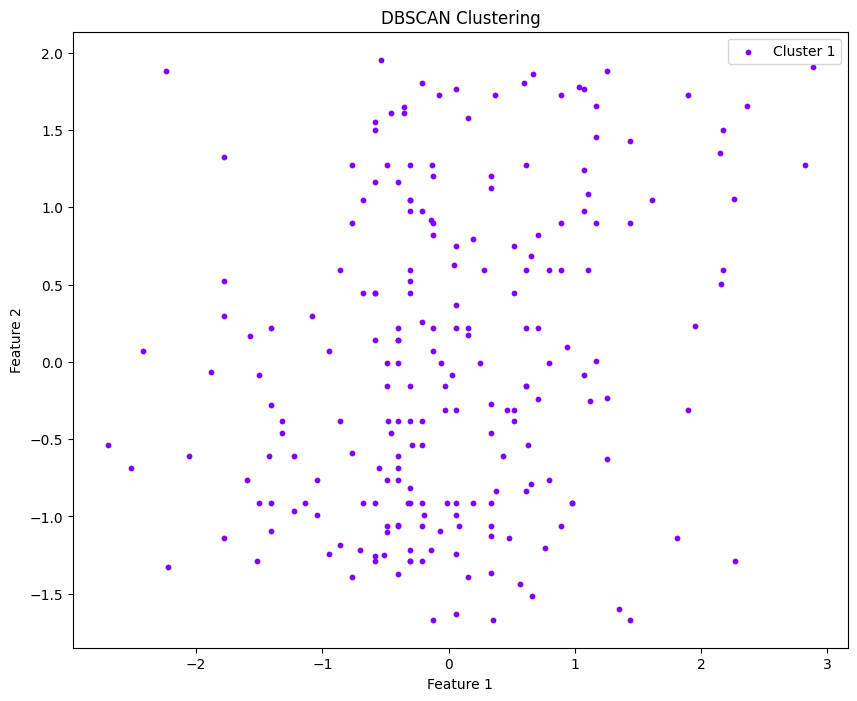

215


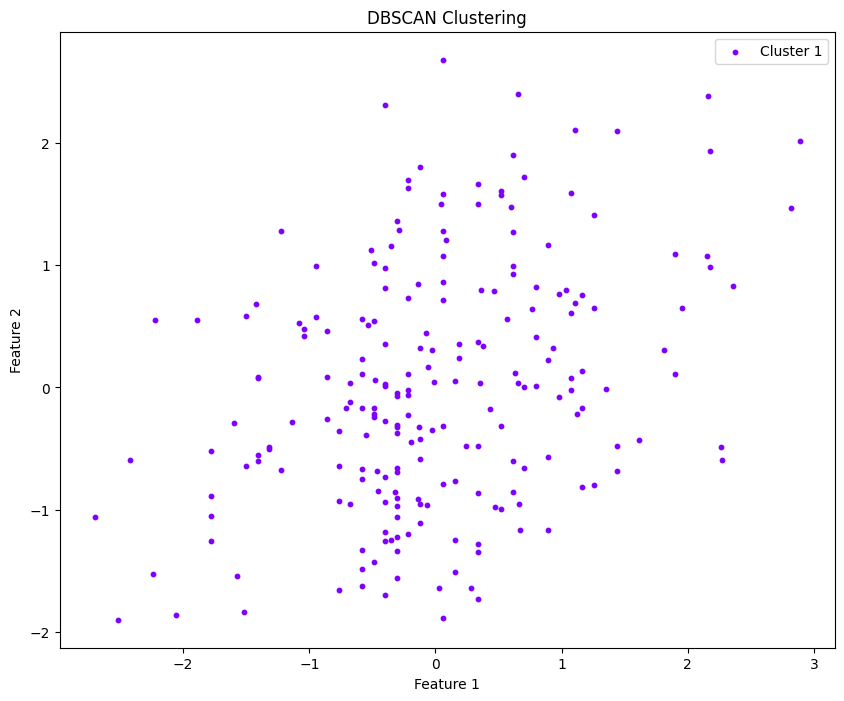

215


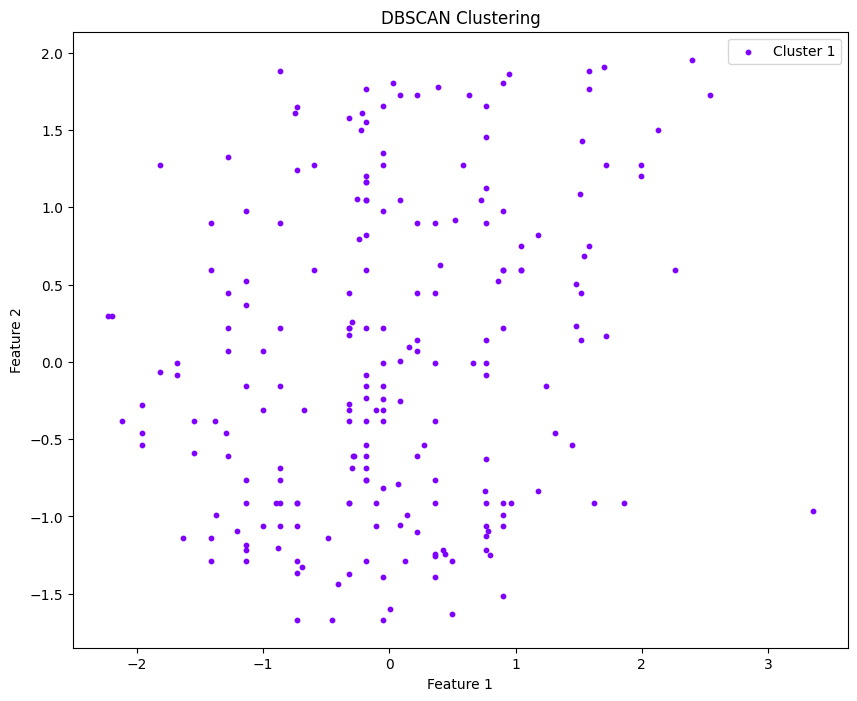

215


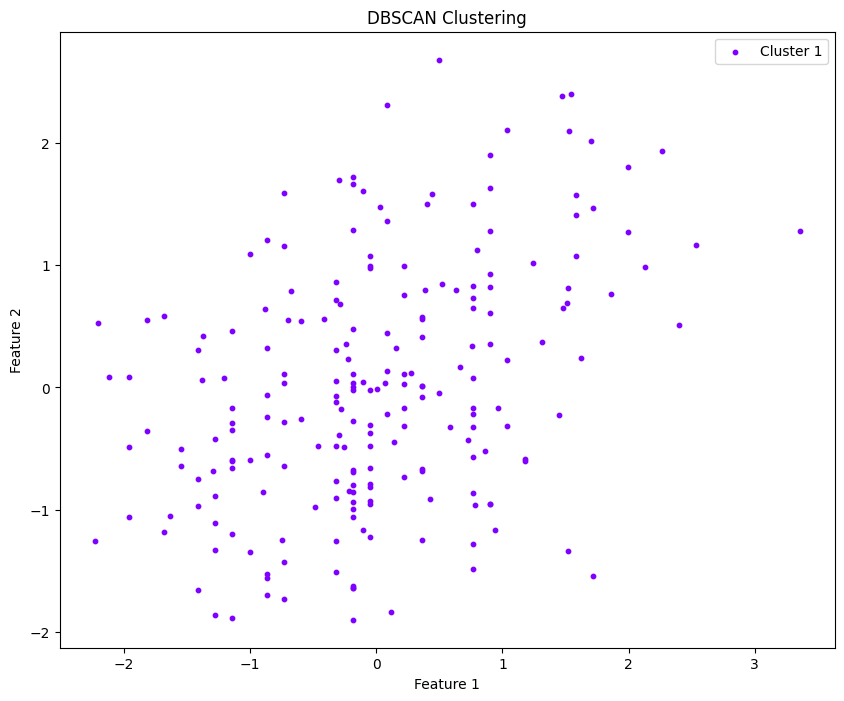

215


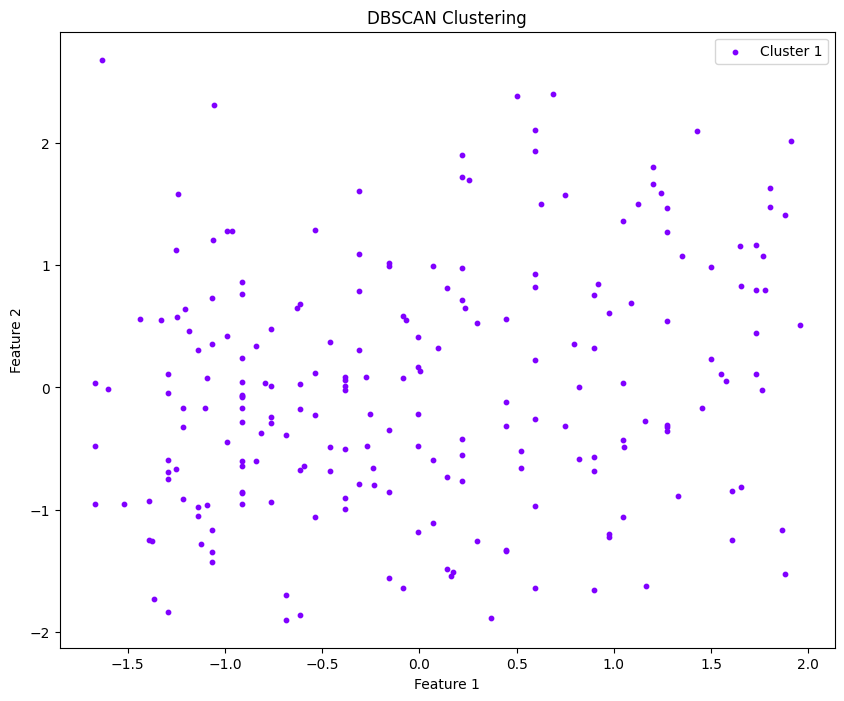

215
['Previous qualification (grade)', 'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']


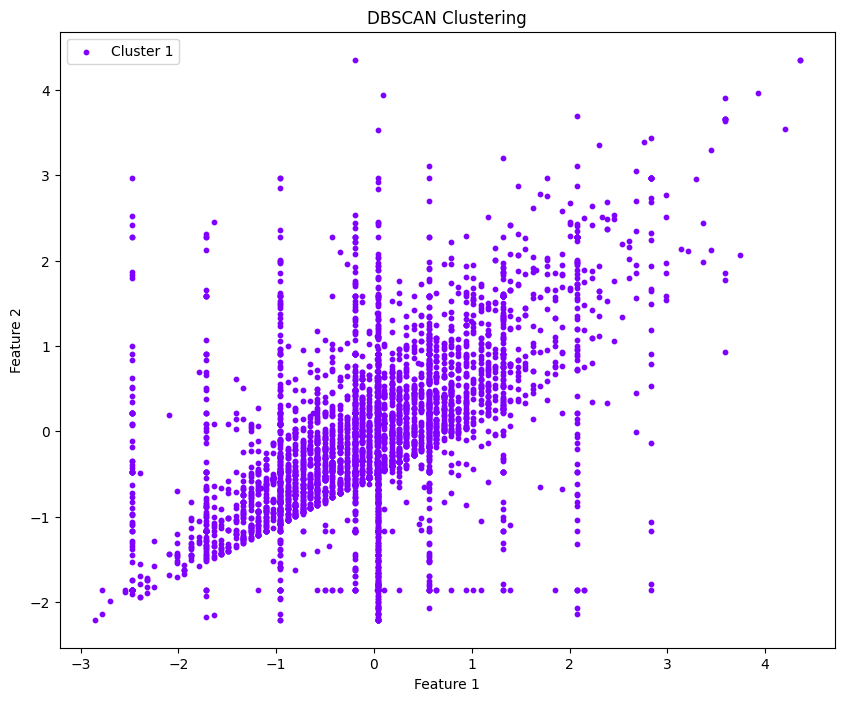

4424


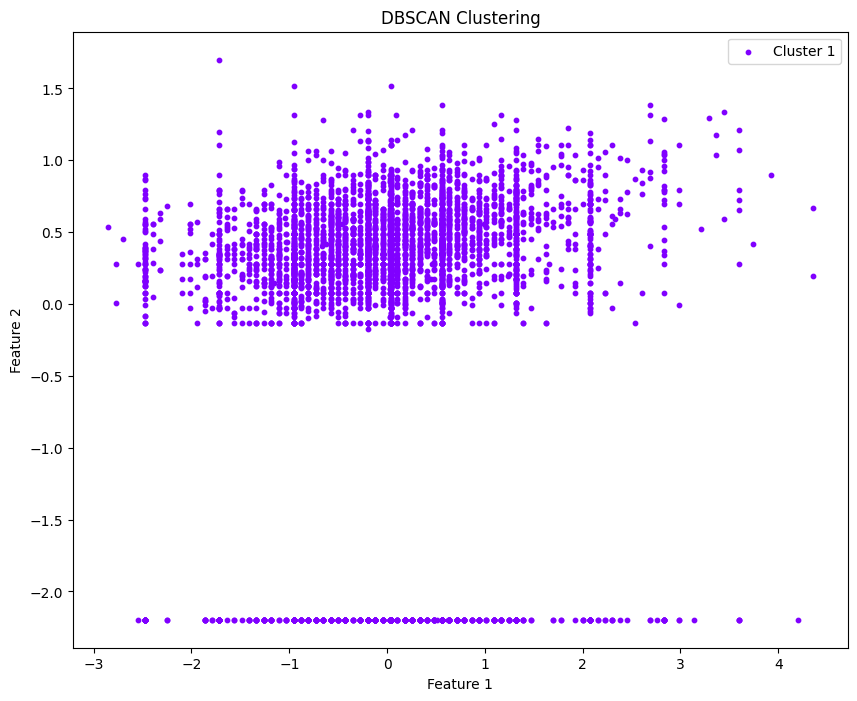

4424


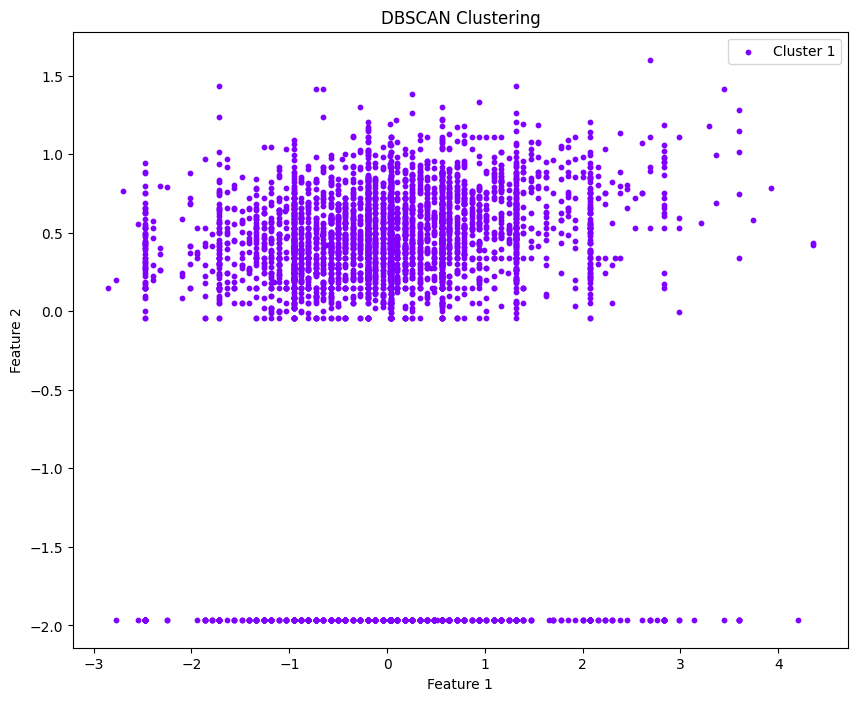

4424


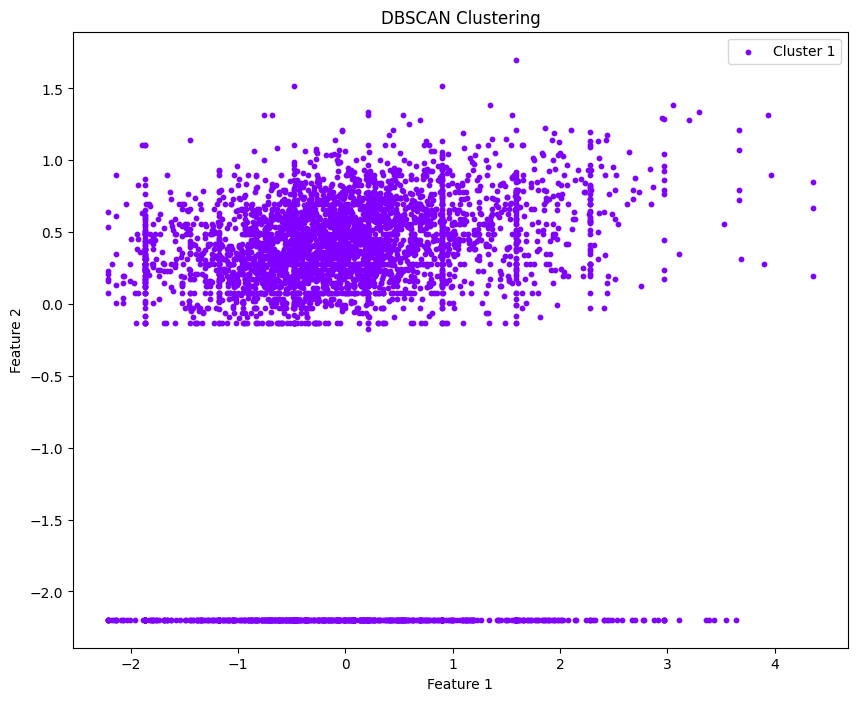

4424


In [ ]:
education_1_df = pd.read_csv('Datasets/campus-placement-prediction.csv')
education_2_df = pd.read_csv('Datasets/predict-dropout-or-academic-success.csv')
education_3_df = pd.read_csv('Datasets/student-performance-dataset.csv')
education_1_df = preprocessing(education_1_df)
education_2_df = preprocessing(education_2_df)
education_3_df = preprocessing(education_3_df)
education_1_df = drop_DBSCAN(education_1_df)
education_2_df = drop_DBSCAN(education_2_df)
education_3_df = drop_DBSCAN(education_3_df)
classify(education_1_df)
classify(education_2_df)
classify(education_3_df)

In [ ]:
df = pd.read_csv('Datasets/student-performance-dataset.csv')
df = identify_unique_id(df)

df = drop_OCSVM(df)
df = drop_DBSCAN(df)
df = drop_IF(df)
classify(df)